# Model Prediction

RouteE models can be loaded from a large library of pre-trained models

In [1]:
import nrel.routee.powertrain as pt

In [2]:
pt.list_available_models()

['2016_TOYOTA_Camry_4cyl_2WD',
 '2017_CHEVROLET_Bolt',
 '2012_Ford_Focus',
 '2012_Ford_Fusion',
 '2016_AUDI_A3_4cyl_2WD',
 '2016_BMW_328d_4cyl_2WD',
 '2016_CHEVROLET_Malibu_4cyl_2WD',
 '2016_CHEVROLET_Spark_EV',
 '2016_FORD_C-MAX_HEV',
 '2016_FORD_Escape_4cyl_2WD',
 '2016_FORD_Explorer_4cyl_2WD',
 '2016_HYUNDAI_Elantra_4cyl_2WD',
 '2016_Hyundai_Tucson_Fuel_Cell',
 '2016_KIA_Optima_Hybrid',
 '2016_Leaf_24_kWh',
 '2016_MITSUBISHI_i-MiEV',
 '2016_Nissan_Leaf_30_kWh',
 '2016_TESLA_Model_S60_2WD',
 '2016_TOYOTA_Corolla_4cyl_2WD',
 '2016_TOYOTA_Highlander_Hybrid',
 '2016_Toyota_Prius_Two_FWD',
 '2017_Maruti_Dzire_VDI',
 '2017_Toyota_Highlander_3',
 '2020_Chevrolet_Colorado_2WD_Diesel',
 '2020_VW_Golf_1',
 '2020_VW_Golf_2',
 '2021_Fiat_Panda_Mild_Hybrid',
 '2021_Peugot_3008',
 '2022_Ford_F-150_Lightning_4WD',
 '2022_Renault_Zoe_ZE50_R135',
 '2022_Tesla_Model_3_RWD',
 '2022_Tesla_Model_Y_RWD',
 '2022_Toyota_Yaris_Hybrid_Mid',
 '2022_Volvo_XC40_Recharge_twin',
 '2023_Mitsubishi_Pajero_Sport']

In [3]:
camry = pt.load_model("2016_TOYOTA_Camry_4cyl_2WD")

In [4]:
camry

========================================
Model Summary
--------------------
Vehicle description: 2016_TOYOTA_Camry_4cyl_2WD
Powertrain type: ICE
Number of estimators: 3
========================================
Estimator Summary
--------------------
Feature: speed_mph (mph)
Distance: miles (miles)
Target: gge (gallons_gasoline)
Raw Predicted Consumption: 30.823 (miles/gallons_gasoline)
Real World Predicted Consumption: 26.435 (miles/gallons_gasoline)
========================================
Estimator Summary
--------------------
Feature: speed_mph (mph)
Feature: grade_dec (decimal)
Distance: miles (miles)
Target: gge (gallons_gasoline)
Raw Predicted Consumption: 30.824 (miles/gallons_gasoline)
Real World Predicted Consumption: 26.436 (miles/gallons_gasoline)
========================================
Estimator Summary
--------------------
Feature: previous_speed_mph (mph)
Feature: speed_mph (mph)
Feature: previous_grade_dec (decimal)
Feature: grade_dec (decimal)
Feature: entry_angle (degrees)
Distance: miles (miles)
Target: gge (gallons_gasoline)
Raw Predicted Consumption: 30.388 (miles/gallons_gasoline)
Real World Predicted Consumption: 26.062 (miles/gallons_gasoline)
========================================

In [17]:
import pandas as pd
links = pd.DataFrame({
    "speed_mph": [10, 20, 30, 40, 50],
    "previous_speed_mph": [10, 20, 30, 40, 50],
    "grade_dec": [0.0, 0.0, -0.05, 0.05, 0.0],
    "previous_grade_dec": [0.0, 0.0, -0.05, 0.05, 0.0],
    "entry_angle": [0.0, 0.0, -90.0, 0.0, 0.0],
    "miles": [1, 1, 1, 1, 1],
})

The pretrained Camry model has multiple estimators available for you to use depending on what features you might have available. You can see a summary of all the estimators in the model summary shown above but you can also just list which feature sets are available:

In [18]:
camry.estimators.keys()

dict_keys(['speed_mph', 'grade_dec&speed_mph', 'entry_angle&grade_dec&previous_grade_dec&previous_speed_mph&speed_mph'])

If we just pass in the links DataFrame without any other information, the model will assume we want to use all the feature and in this case will look for an internal estimator with features to match all the columns.

In [19]:
camry.predict(links)

,gge
0,0.049253
1,0.031506
2,0.012659
3,0.049276
4,0.022827


If we want to use a different estimator, we can tell the predict method to only use a subset of the features. In this case, we'll tell the model to only use speed & grade

In [21]:
camry.predict(links, feature_columns=["speed_mph", "grade_dec"])

,gge
0,0.048834
1,0.042926
2,0.017658
3,0.053413
4,0.025090


We can also apply some correction factors for effects that are not directly captured in the energy data the model was trained on. These include things like:
 - Ambient Temperature
 - Auxilary loads (i.e. Air Conditioners)

These are powertrain specific and can be included by passing the `apply_real_world_adjustment` paramter which is set to False by default.

In [22]:
camry.predict(links, apply_real_world_adjustment=True)

,gge
0,0.057429
1,0.036736
2,0.014761
3,0.057456
4,0.026616


Note that we see higher energy values when apply these factors

Lastly, we can take a look at the validation errors for each estimator that the model has.

In [23]:
camry.errors

====================================================
Feature Set ID:                  speed_mph
Target:                          gge
Link RMSE                        0.001
Link Norm RMSE                   0.792
Link Weighted RPD                0.433
Net Error                        0.017
Actual Dist/Energy               31.350
Predicted Dist/Energy            30.823
Real World Predicted Dist/Energy 26.435
Trip RPD                         0.192
Trip Weighted RPD                0.117
Trip RMSE                        0.010
Trip Norm RMSE                   0.192
====================================================
Feature Set ID:                  grade_dec&speed_mph
Target:                          gge
Link RMSE                        0.001
Link Norm RMSE                   0.663
Link Weighted RPD                0.367
Net Error                        0.017
Actual Dist/Energy               31.350
Predicted Dist/Energy            30.824
Real World Predicted Dist/Energy 26.436
Trip RPD                         0.169
Trip Weighted RPD                0.097
Trip RMSE                        0.008
Trip Norm RMSE                   0.154
====================================================
Feature Set ID:                  entry_angle&grade_dec&previous_grade_dec&previous_speed_mph&speed_mph
Target:                          gge
Link RMSE                        0.001
Link Norm RMSE                   0.674
Link Weighted RPD                0.330
Net Error                        0.032
Actual Dist/Energy               31.350
Predicted Dist/Energy            30.388
Real World Predicted Dist/Energy 26.062
Trip RPD                         0.160
Trip Weighted RPD                0.098
Trip RMSE                        0.009
Trip Norm RMSE                   0.173
====================================================

## Model Visualization

There are a few different functions we can visualize what a model is predicting over a range of inputs.

The first is the `visualize_features` function that sweeps a feature over a range and plots the results.
In order to use this we first have to define what ranges the features should be considered.

In [32]:
feature_ranges = {
    "speed_mph": {"min": 2, "max": 100, "steps": 50},
    "grade_dec": {"min": -0.2, "max": 0.2, "steps": 50}
}

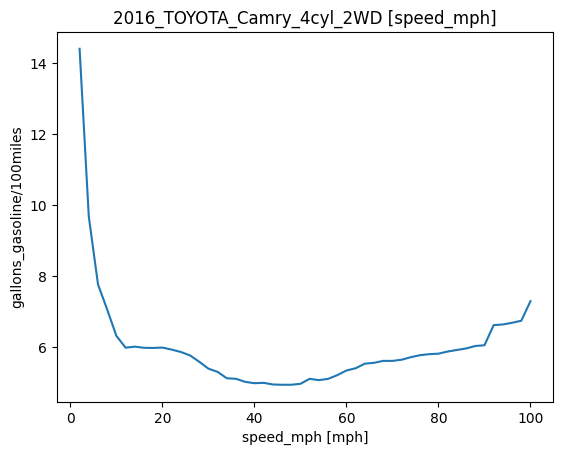

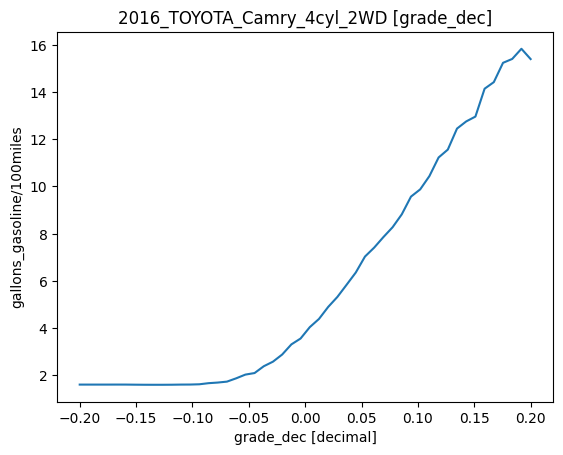

<Figure size 640x480 with 0 Axes>

In [33]:
results = pt.visualize_features(camry, feature_ranges)

We can also look at two features simultaneously with the `contour_plot` function. 

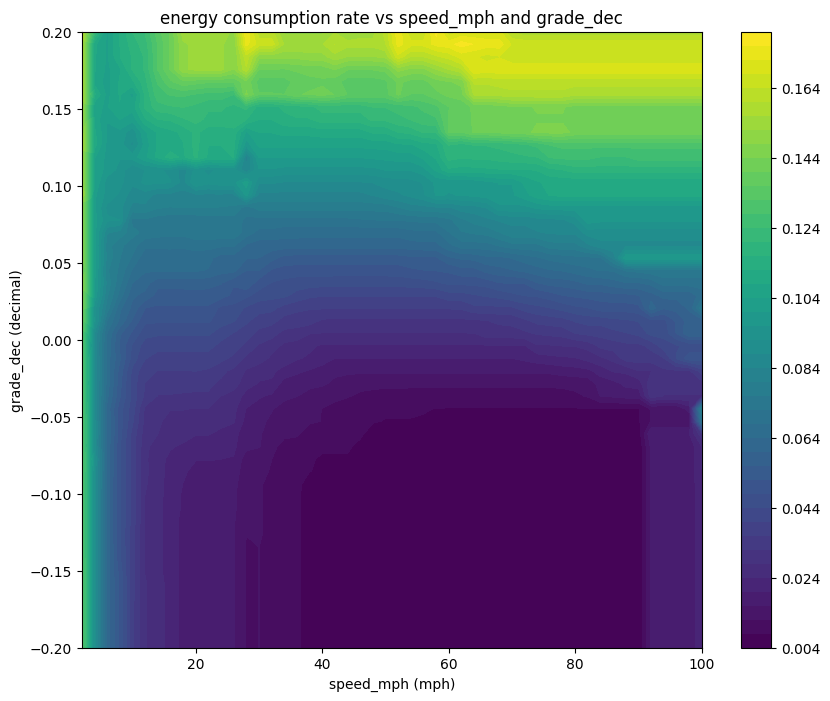

In [44]:
pt.contour_plot(camry, x_feature="speed_mph", y_feature="grade_dec", feature_ranges=feature_ranges)